In [ ]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 创建样本点

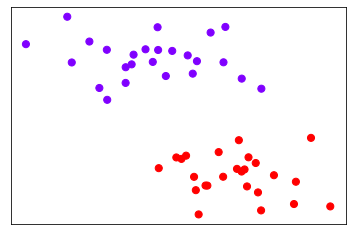

In [37]:
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6) #50个样本，2个中心
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

# 获得网格数据点

In [ ]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [ ]:
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [ ]:
axisx,axisy = np.meshgrid(axisx,axisy)

In [41]:
axisx.shape

(30, 30)

In [42]:
axisx.ravel().shape

(900,)

In [ ]:
xy=np.vstack([axisx.ravel(),axisy.ravel()]).T
# 其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来

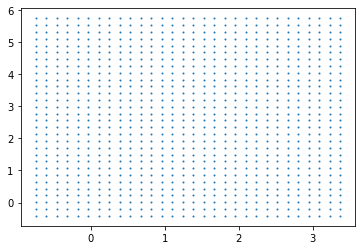

In [44]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

# 建模，通过fit计算出对应的决策边界

In [ ]:
clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)

# 画出决策边界和平行于决策边界的超平面

(-0.4187238247634958, 5.75487048788989)

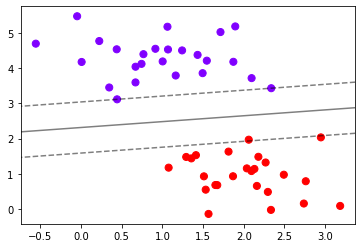

In [46]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax=plt.gca()  #获取当前的子图，如果不存在，则创建新的子图

ax.contour(axisx,axisy,Z,
           colors="k",
           levels=[-1,0,1],   #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           alpha=0.5,
           linestyles=["--","-","--"]) 
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# 汇总

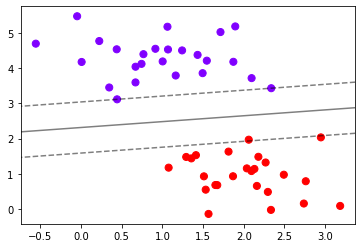

In [48]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

def plot_svc_decision_function(model, ax=None):
    if ax is None:
        #获取当前的子图，如果不存在，则创建新的子图
        ax = plt.gca()  
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    axisx = np.linspace(xlim[0], xlim[1],30)
    axisy = np.linspace(ylim[0], ylim[1],30)
    
    # 其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
    axisx, axisy = np.meshgrid(axisx, axisy)
    
    xy=np.vstack([axisx.ravel(), axisy.ravel()]).T
    Z = clf.decision_function(xy).reshape(axisx.shape)
    ax.contour(axisx, axisy, Z,
           colors = "k",
           levels = [-1,0,1],   #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           alpha = 0.5,
           linestyles = ["--", "-", "--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
# 训练模型
clf = SVC(kernel = "linear").fit(X,y)
plot_svc_decision_function(clf)

# 训练器的基本使用

In [51]:
clf.predict(X)  # 预测

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [52]:
clf.score(X,y) #返回给定测试数据和标签的平均准确度

1.0

In [53]:
clf.support_vectors_ #返回支持向量（点坐标）

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [54]:
clf.n_support_ #返回每个类中支持向量的个数

array([2, 1], dtype=int32)

# 非线性数据集上的推广与3D可视化

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X,y = make_circles(100,factor=0.1,noise=.1)

In [58]:
X.shape      # 100个样本，两个特征

(100, 2)

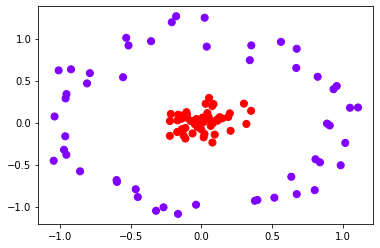

In [62]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

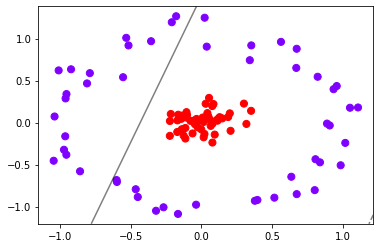

In [63]:
clf = SVC(kernel="linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

## 添加维度

In [ ]:
r = np.exp(-(X**2)).sum(1)

In [ ]:
rlim = np.linspace(min(r),max(r),30)

# 绘制 

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
# 定义一个绘制三维图像的函数
# elev表示上下旋转的角度
# azim表示平行旋转的角度

def plot_3D(elev=30, azim=30,X=X,y=y):
  ax = plt.subplot(projection="3d")
  ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_zlabel("z")
  plt.show()

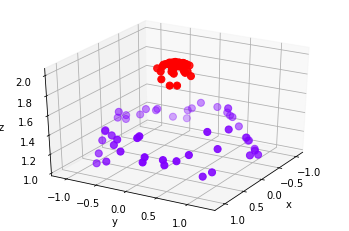

In [78]:
plot_3D()

# 我们也可以不通过核变换，直接通过高斯核函数来求决策边界

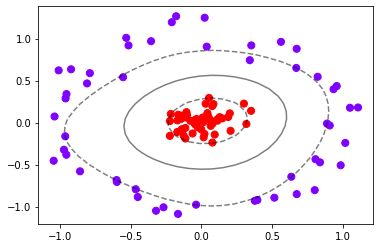

In [79]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)